In [177]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

%matplotlib inline



import astropy.constants as const

In [178]:
# Read in the WCS from the data cube,
# so that we can directly paste it into the
# maps we're making

########## EDIT STUFF HERE ################


z = 0.0821  # Using the Ca II H+K line Stellar Systemic Redshift
cz = z * const.c.to('km/s')

fov = 'IMAGE_FOV_0001.fits'
inmask = 'Ha.fits'
stars = 'A2597.kin_table.fits'
gas = 'A2597.eline_table.fits'

#############################################

In [179]:
# Read in the emission line table, from which we'll make gas maps
eline_hdu = fits.open(gas)
eline_tab = eline_hdu[1].data


eline_columns = eline_hdu[1].header

In [180]:
stars_hdu = fits.open(stars)
stars_tab = stars_hdu[1].data

stars_columns = stars_hdu[1].header

In [181]:
stars_columns

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   24 / length of dimension 1                          
NAXIS2  =               121490 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'x_cor   '                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'y_cor   '                                                            
TFORM2  = 'J       '                                                            
TTYPE3  = 'vel_fit '        

In [182]:
eline_columns

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  272 / width of table in bytes                        
NAXIS2  =                35217 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   68 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'x_cor   '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TTYPE2  = 'y_cor   '           / label for column 2                             
TFORM2  = 'J       '        

In [183]:
### MAKE FOV

hdu = fits.open(fov)
hdr = hdu[1].header
dim = hdu[1].data.shape
hdu.close()

#### MAKE MASK

maskdata = fits.open(inmask)
thresh = maskdata[0].data

sourcemask = (thresh < 0.001)

#### MAKE STARS

In [184]:

##### MAKE GAS

eline_x_cor = eline_tab.field('x_cor')
eline_y_cor = eline_tab.field('y_cor')

Ha_flux = eline_tab.field('Halpha_flux')
Ha_flux_err = eline_tab.field('Halpha_flux_err')
Ha_vel = eline_tab.field('Halpha_vel')
Ha_vel_err = eline_tab.field('Halpha_vel_err')
Ha_fwhm = eline_tab.field('Halpha_fwhm')
Ha_fwhm_err = eline_tab.field('Halpha_fwhm_err')


Hb_flux = eline_tab.field('Hbeta_flux')
Hb_flux_err = eline_tab.field('Hbeta_flux_err')
Hb_vel = eline_tab.field('Hbeta_vel')
Hb_vel_err = eline_tab.field('Hbeta_vel_err')
Hb_fwhm = eline_tab.field('Hbeta_fwhm')
Hb_fwhm_err = eline_tab.field('Hbeta_fwhm_err')


OIII5007_flux = eline_tab.field('OIII5007_flux')
OIII5007_vel = eline_tab.field('OIII5007_vel')
OIII5007_fwhm = eline_tab.field('OIII5007_fwhm')

OI6300_flux = eline_tab.field('OI6300_flux')
OI6300_vel = eline_tab.field('OI6300_vel')
OI6300_fwhm = eline_tab.field('OI6300_fwhm')


gas_select = (Ha_fwhm < 1000.0)

Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_vel_map = np.full((dim[0],dim[1]), np.nan)
Ha_fwhm_map = np.full((dim[0],dim[1]), np.nan)

Ha_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_flux[gas_select]
Ha_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_vel[gas_select] - cz.value
Ha_fwhm_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_fwhm[gas_select]

Ha_flux_map[sourcemask] = np.nan
Ha_vel_map[sourcemask] = np.nan
Ha_fwhm_map[sourcemask] = np.nan

### H$\alpha$ Flux

/Applications/Anaconda/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


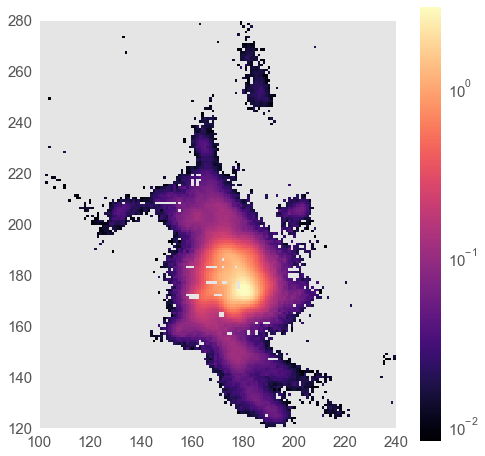

In [185]:

fig, ax = plt.subplots(figsize=(8,8))

im = plt.imshow(Ha_flux_map, vmin=0.008, vmax=3, origin='Lower', cmap='magma', norm=LogNorm())

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)
fig.savefig("muse_flux_sidebyside_BEAUTIFUL.pdf")

## H$\alpha$ Velocity

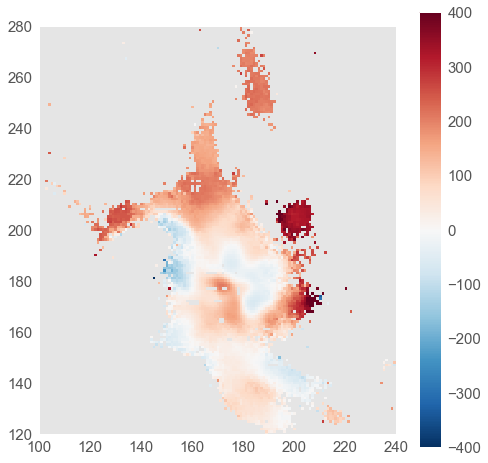

In [186]:
fig, ax = plt.subplots(figsize=(8,8))

im = plt.imshow(Ha_vel_map, vmin=-400, vmax=400, origin='Lower', cmap='RdBu_r')

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)
fig.savefig("muse_vel_sidebyside_BEAUTIFUL.pdf")

## H$\alpha$ Velocity Dispersion

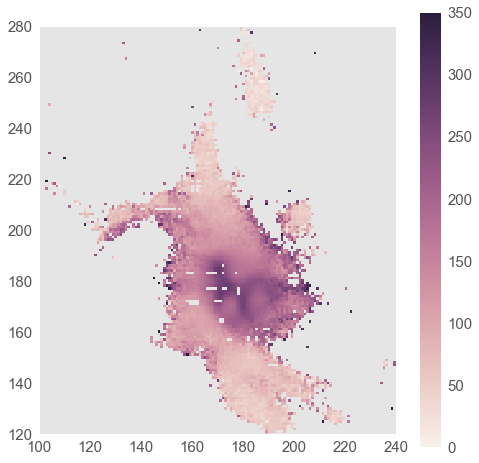

In [187]:

fig, ax = plt.subplots(figsize=(8,8))

im = plt.imshow(Ha_fwhm_map/2.35, origin='Lower', vmin=0, vmax=350, cmap=sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True))

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)
fig.savefig("muse_disp_sidebyside_BEAUTIFUL.pdf")

### Extinction

/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


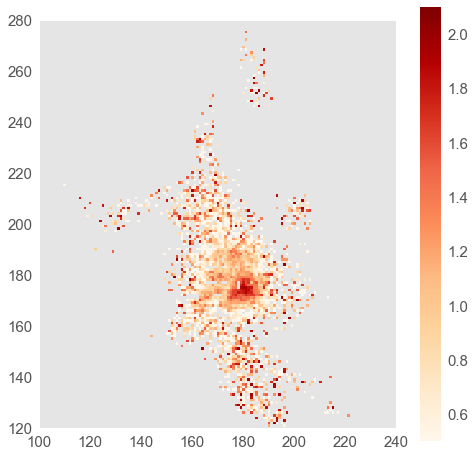

In [188]:

extinction = fits.getdata('av.fits')

fig, ax = plt.subplots(figsize=(8,8))

cmap = 'OrRd'
#cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)


mask = extinction > 2
extinction[mask] = np.nan

im = plt.imshow(extinction, origin='Lower', vmin=0.5, vmax=2.1, cmap=cmap)

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)
fig.savefig('av.pdf')

### Ionization Parameter

See e.g. [here](https://arxiv.org/pdf/1704.08367.pdf). 

/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


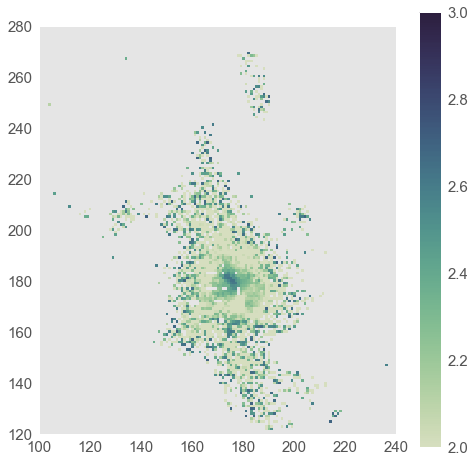

In [189]:
density = fits.getdata('ne.fits')


fig, ax = plt.subplots(figsize=(8,8))

#cmap = sns.dark_palette("muted purple", input="xkcd", as_cmap=True)

cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
#cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)

mask = density > 2.7
density[mask] = np.nan

im = plt.imshow(density, origin='Lower', vmin=2, vmax=3, cmap=cmap)

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)
fig.savefig('ne.pdf')

#### BPT Ratio

In [190]:
Ha_map = fits.getdata('Ha_flux_map.fits')
O3_map = fits.getdata('OIII5007_flux_map.fits')
Hb_map= fits.getdata('Hb_flux_map.fits')
N2_map = fits.getdata('NII6583_flux_map.fits')

In [191]:
select_SF = (np.log10(O3_map/Hb_map)<(0.61/(np.log10(N2_map/Ha_map)-0.05)+1.3)) & (np.log10(N2_map/Ha_map)<0.2)
select_inter = (np.log10(O3_map/Hb_map)<(0.61/(np.log10(N2_map/Ha_map)-0.47)+1.19)) & (np.log10(N2_map/Ha_map)<0.2) & (select_SF==False)
# select_liner = (np.log10(O3_map/Hb_map)<(np.log10(N2_map/Ha_map)+0.43)/np.cos(59*np.pi/180.0)-0.49) &        (select_SF==False) & (select_inter==False)
# select_AGN = (np.log10(O3_map/Hb_map)>(np.log10(N2_map/Ha_map)+0.43)/np.cos(59*np.pi/180.0)-0.49) & (select_SF==False) & (select_inter==False)
select_liner = (np.log10(O3_map/Hb_map)<(1.05 * np.log10(N2_map/Ha_map)+0.45)) & (select_SF==False) & (select_inter==False)
select_AGN = (np.log10(O3_map/Hb_map)>(1.05 * np.log10(N2_map/Ha_map)+0.45)) & (select_SF==False) & (select_inter==False)
excitation = np.zeros_like(Ha_map)
excitation[select_SF] = 1
excitation[select_inter] = 2
excitation[select_liner] = 3
excitation[select_AGN] = 4
excitation[excitation==0.0] = np.nan

/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher

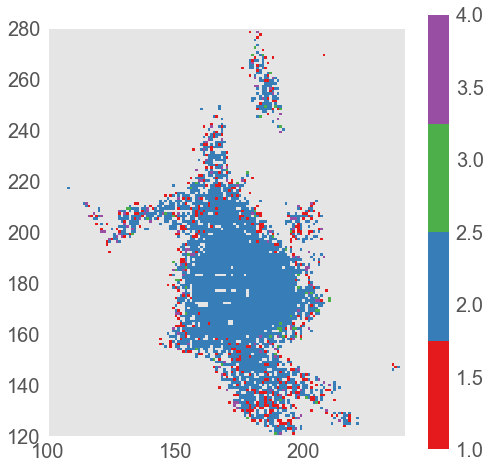

In [204]:
#plt.style.use('seaborn')
# import brewer2mpl
# bmap = brewer2mpl.get_map('Set1', 'qualitative', 4)

# brewercolors = bmap.mpl_colors

from palettable.colorbrewer.qualitative import Set1_4 as brewermap
from matplotlib.colors import ListedColormap


cmap = ListedColormap(brewermap.mpl_colors)

fig, ax = plt.subplots(figsize=(8,8), facecolor='white')


im = plt.imshow(excitation, origin='Lower',  cmap=cmap)

ax.set_xlim(100, 240)
ax.set_ylim(120,280)
ax.grid(False)

fig.colorbar(im, ax=ax)

plt.savefig("bpt_map.pdf")

In [193]:
from hrcsentinel import hrccore

In [197]:
def styleplots():
    """
    Make plots pretty and labels clear.
    """
    plt.style.use('ggplot')

    labelsizes = 20

    plt.rcParams['font.size'] = labelsizes
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['axes.titlesize'] = labelsizes
    plt.rcParams['axes.labelsize'] = labelsizes
    plt.rcParams['xtick.labelsize'] = labelsizes
    plt.rcParams['ytick.labelsize'] = labelsizes
    
styleplots()

/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/Applications/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


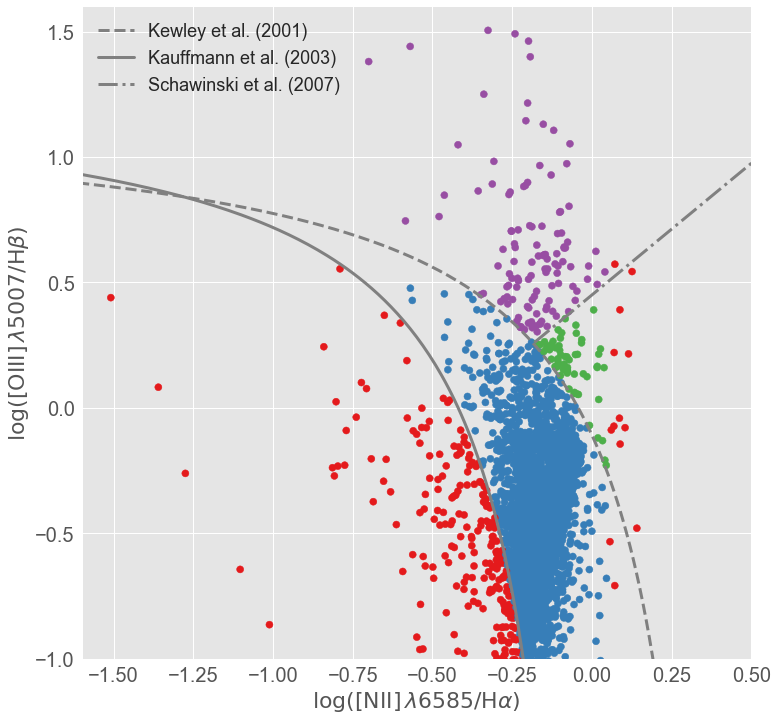

In [202]:
plt.rcParams['font.sans-serif'] = 'Arial'

fig, ax = plt.subplots(figsize=(12,12))

t = np.arange(-2.0,0.3,0.01)
l = np.arange(-2.0,0.0,0.01)
s = np.arange(-0.18, 1.5, 0.01)

# color_number = 0
# color_choice = list(plt.rcParams['axes.prop_cycle'])[color_number]['color']


x, y = np.log10(N2_map/Ha_map), np.log10(O3_map/Hb_map)
#ax.plot(np.log10(N2_map/Ha_map),np.log10(O3_map/Hb_map),'o',ms=2)


ax.scatter(np.log10(N2_map/Ha_map), np.log10(O3_map/Hb_map), c=excitation, cmap=cmap)

ax.plot(t,(0.61/(t-0.47)+1.19),'--',color='gray',linewidth=3,label='Kewley et al. (2001)',zorder=1)
ax.plot(l,(0.61/(l-0.05)+1.3),'-',color='gray',linewidth=3,label='Kauffmann et al. (2003)',zorder=1)
# ax.plot(s, s+0.43/np.cos(59*np.pi/180.0)-0.49)
ax.plot(s, (1.05*s + 0.45),'-.',color='gray',linewidth=3,label='Schawinski et al. (2007)',zorder=1)
ax.set_xlim([-1.6, 0.5])
ax.set_ylim([ -1.0, 1.6])
ax.set_ylabel(r'$\log(\mathrm{[O III]}\,\lambda 5007 / \mathrm{H}\beta)$',fontsize=22)
ax.set_xlabel(r'$\log(\mathrm{[N II]}\,\lambda 6585 / \mathrm{H}\alpha)$',fontsize=22)
#ax.minorticks_on()
  #leg = ax7.legend(loc='upper left')
# ax.tick_params(axis='both',which='both',width=2,labelsize=20)
# ax.tick_params(axis='both',which='major',length=8)
# ax.tick_params(axis='both',which='minor',length=4)
#plt.savefig(outfig,dpi=dpi)

ax.legend(loc=2, prop={'size': 18})

plt.savefig("bpt_panel.pdf")

Kauffman line is emprical SF line, kewley line is theoretical maximum starburst model, Schawinski line is empirical Seyfert-LINER separation. 